In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:

data.rename(columns={'customer_id': 'Account Number'}, inplace=True)

In [5]:

data.rename(columns={'tenure': 'Number of years'}, inplace=True)

In [6]:
data.head()

,Account Number,credit_score,country,gender,age,Number of years,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.describe()

,Account Number,credit_score,age,Number of years,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.shape

(10000, 12)

In [9]:
data.isnull().sum()

,0
Account Number,0
credit_score,0
country,0
gender,0
age,0
Number of years,0
balance,0
products_number,0
credit_card,0
active_member,0


In [10]:
data.nunique()

,0
Account Number,10000
credit_score,460
country,3
gender,2
age,70
Number of years,11
balance,6382
products_number,4
credit_card,2
active_member,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account Number    10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   Number of years   10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
print(data['age'].value_counts())

age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64


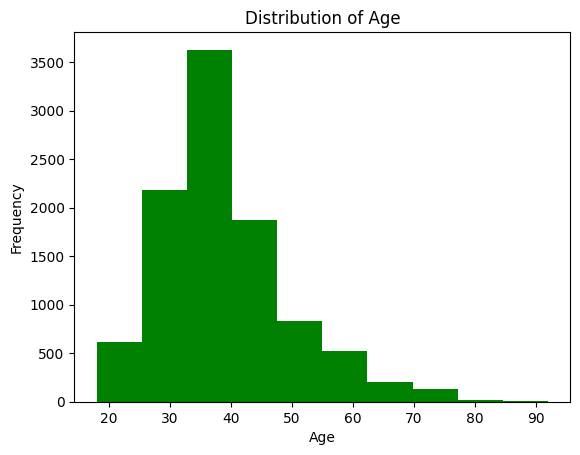

In [27]:
plt.hist(data['age'], facecolor='g' ,bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

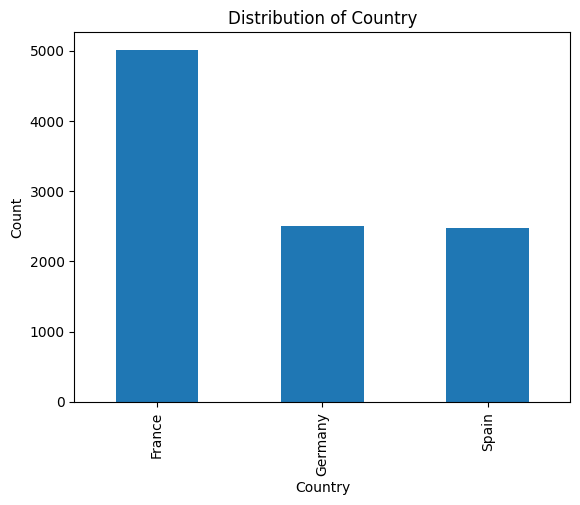

In [28]:
data['country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')
plt.show()

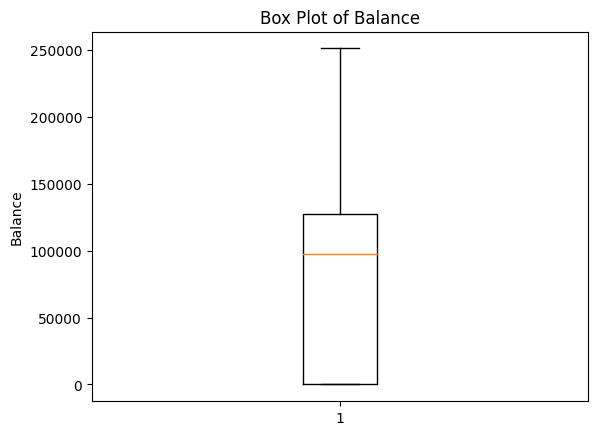

In [29]:
plt.boxplot(data['balance'])
plt.ylabel('Balance')
plt.title('Box Plot of Balance')
plt.show()

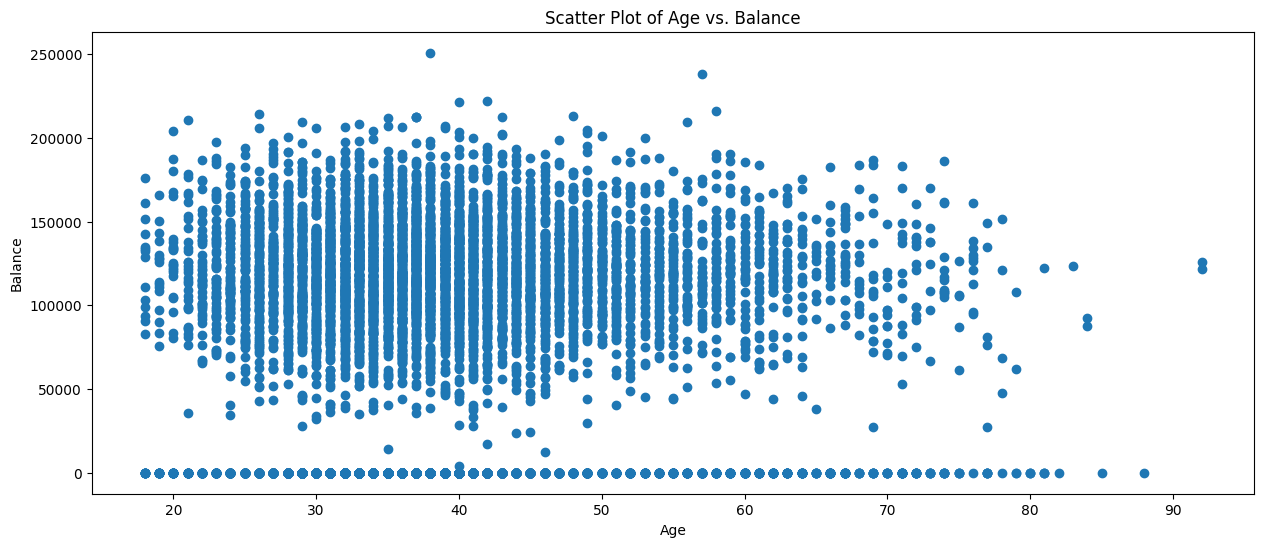

In [31]:
figure = plt.figure(figsize=(15, 6))
plt.scatter(data['age'], data['balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs. Balance')
plt.show()

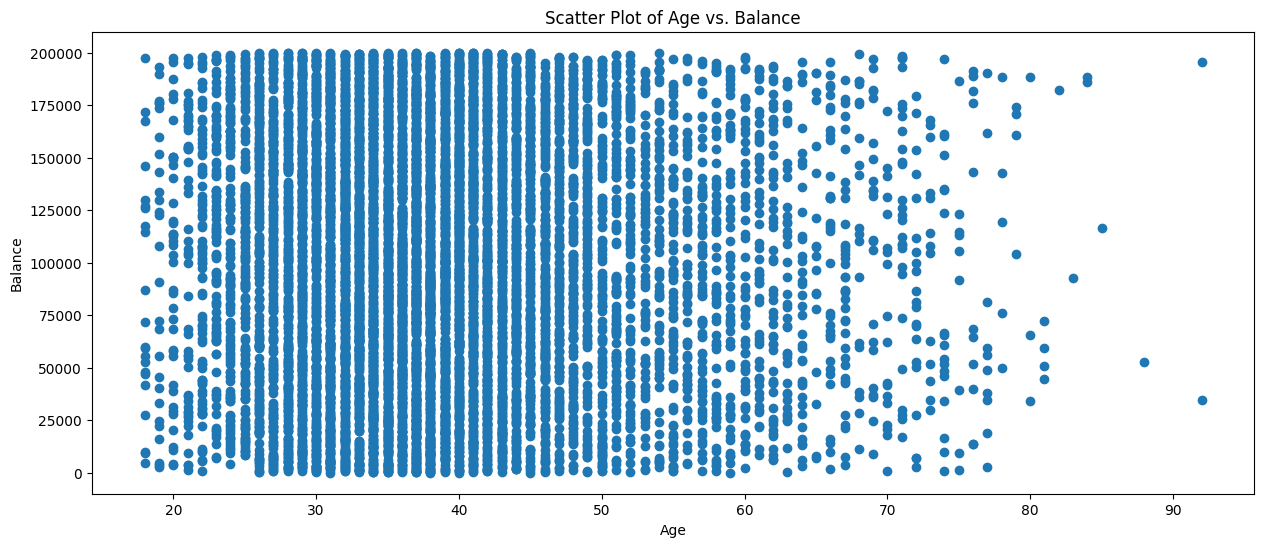

In [32]:
figure = plt.figure(figsize=(15, 6))
plt.scatter(data['age'], data['estimated_salary'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs. Balance')
plt.show()

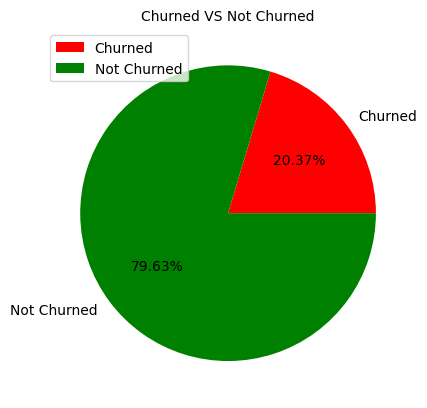

In [13]:
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
labels = ['Churned', 'Not Churned']
colors = ['red', 'Green']

plt.pie(sizes, labels=labels, autopct='%.2f%%', colors=colors)
plt.legend(loc='upper left')
plt.title("Churned VS Not Churned", size=10)
plt.show()

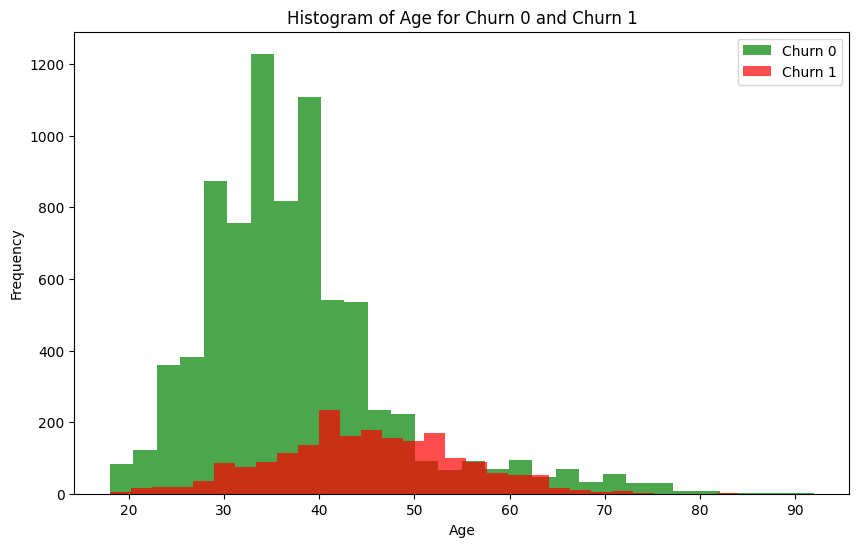

In [14]:
churn_0_age = data[data["churn"] == 0]["age"]
churn_1_age = data[data["churn"] == 1]["age"]
plt.figure(figsize=(10, 6))
plt.hist(churn_0_age, bins=30, alpha=0.7, color="Green", label="Churn 0")
plt.hist(churn_1_age, bins=30, alpha=0.7, color="Red", label="Churn 1")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for Churn 0 and Churn 1")
plt.legend()
plt.show()

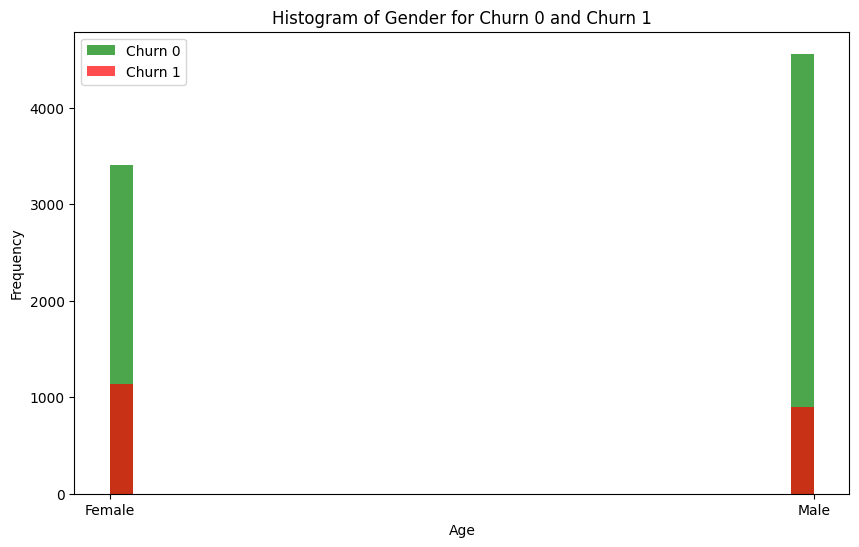

In [15]:
churn_0_age = data[data["churn"] == 0]["gender"]
churn_1_age = data[data["churn"] == 1]["gender"]
plt.figure(figsize=(10, 6))
plt.hist(churn_0_age, bins=30, alpha=0.7, color="Green", label="Churn 0")
plt.hist(churn_1_age, bins=30, alpha=0.7, color="Red", label="Churn 1")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Gender for Churn 0 and Churn 1")
plt.legend()
plt.show()

<Axes: xlabel='credit_card'>

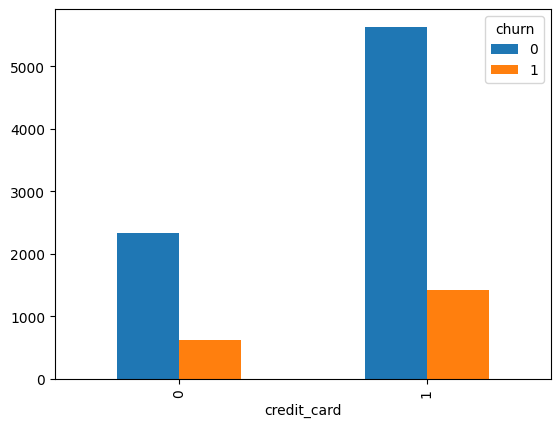

In [17]:
data.groupby(['credit_card', 'churn']).churn.count().unstack().plot(kind='bar')

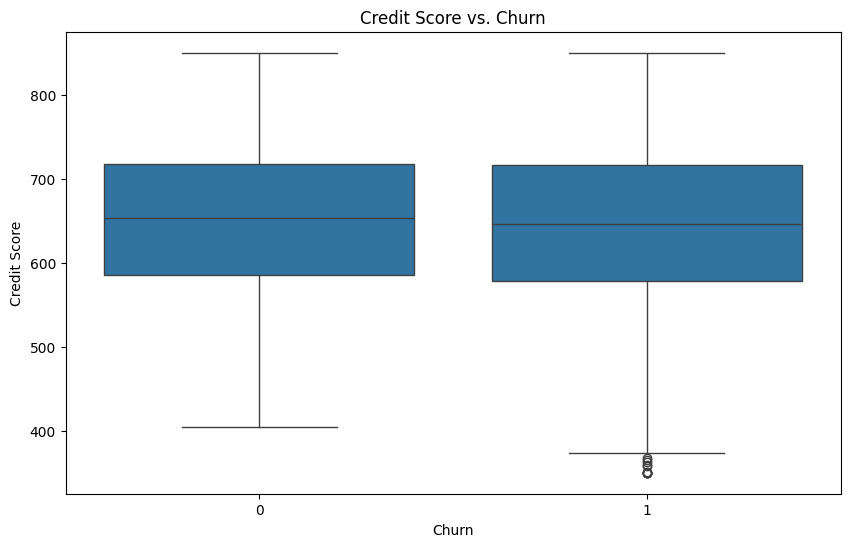

              credit_score     churn
credit_score      1.000000 -0.027094
churn            -0.027094  1.000000


In [ ]:
# prompt: Credit Score and Churn
# How does a customer’s credit score relate to their likelihood of churning?

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='credit_score', data=data)
plt.title('Credit Score vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()
correlation_matrix = data[['credit_score', 'churn']].corr()
print(correlation_matrix)



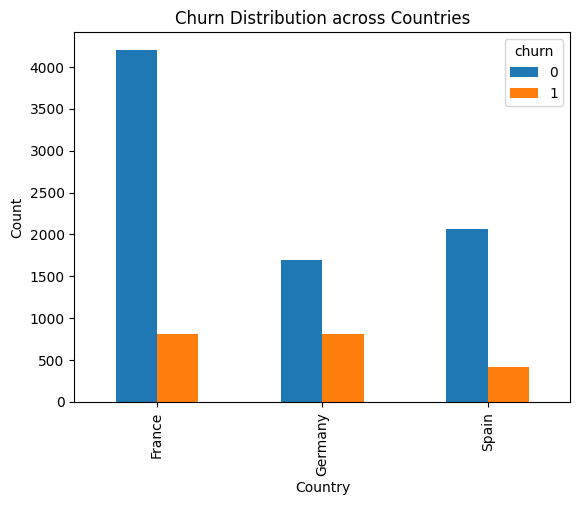

In [33]:
pd.crosstab(data['country'], data['churn']).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churn Distribution across Countries')
plt.show()

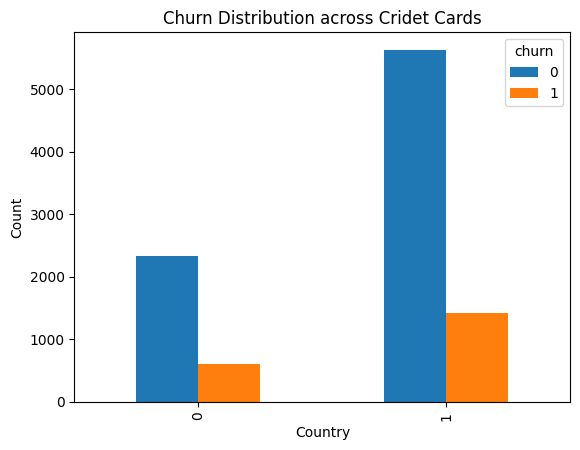

In [35]:
pd.crosstab(data['credit_card'], data['churn']).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churn Distribution across Cridet Cards')
plt.show()

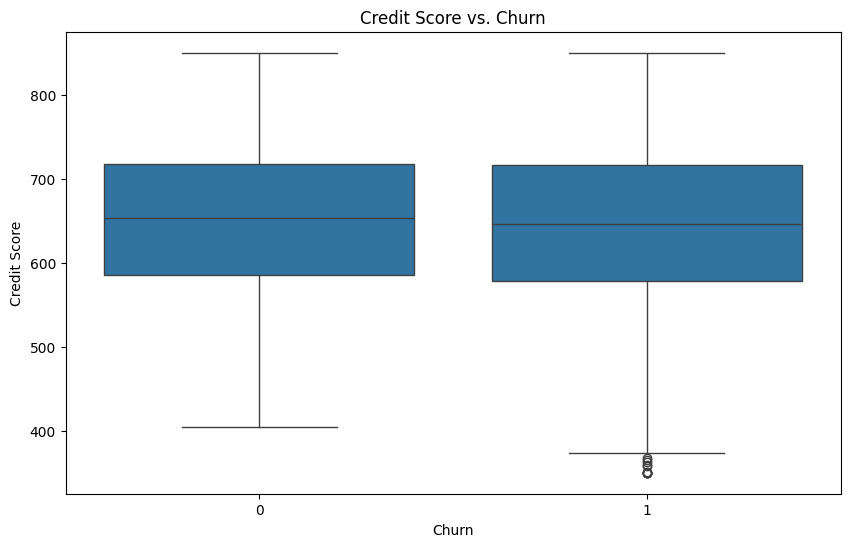

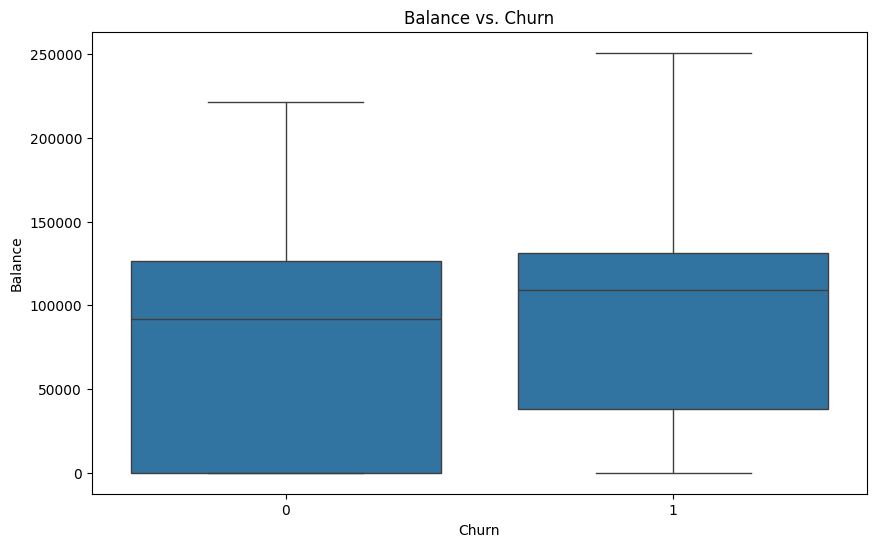

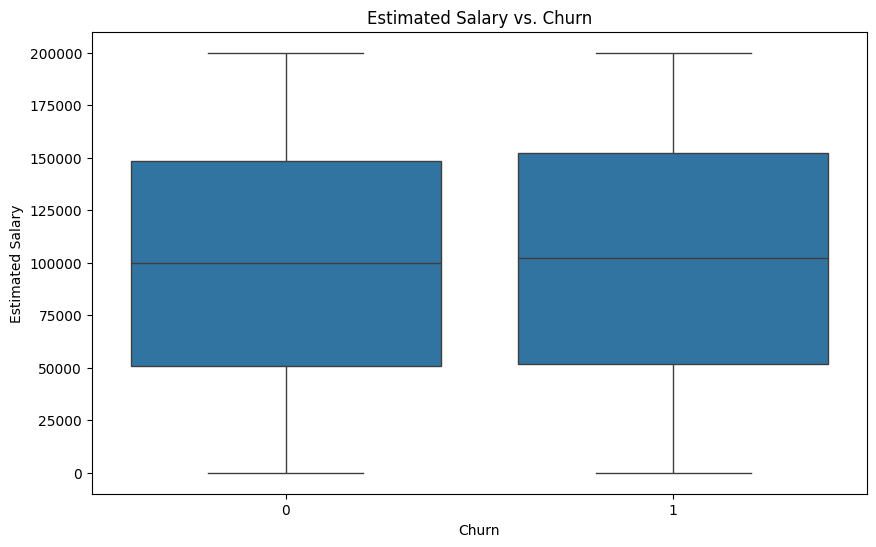

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='credit_score', data=data)
plt.title('Credit Score vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='balance', data=data)
plt.title('Balance vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='estimated_salary', data=data)
plt.title('Estimated Salary vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Estimated Salary')
plt.show()

**Analyze distributions of categorical features**

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


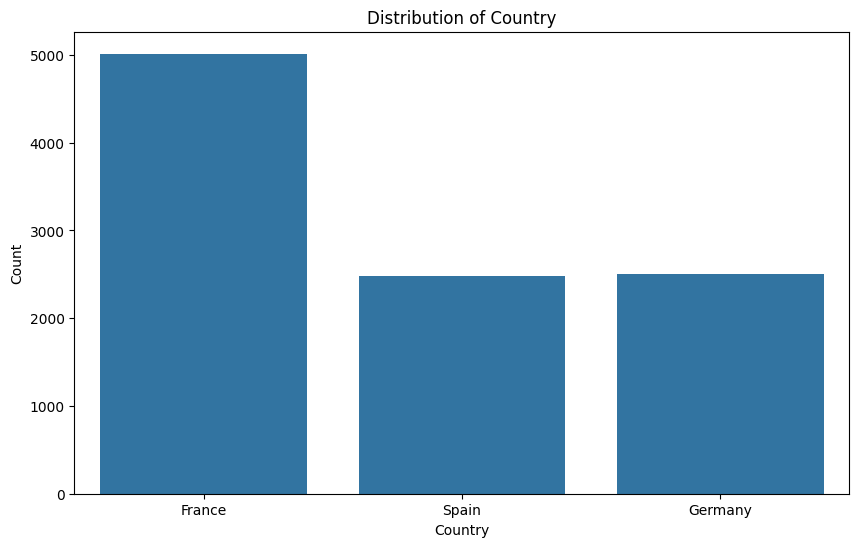

gender
Male      5457
Female    4543
Name: count, dtype: int64


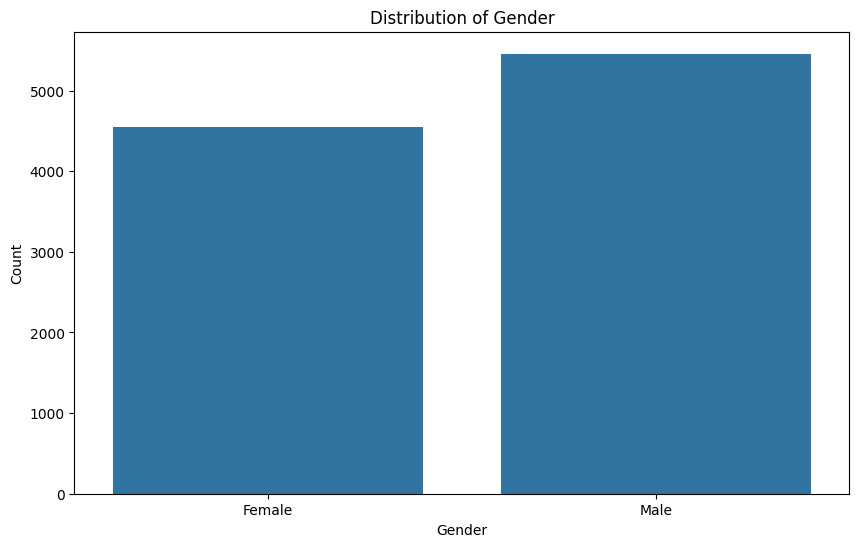

credit_card
1    7055
0    2945
Name: count, dtype: int64


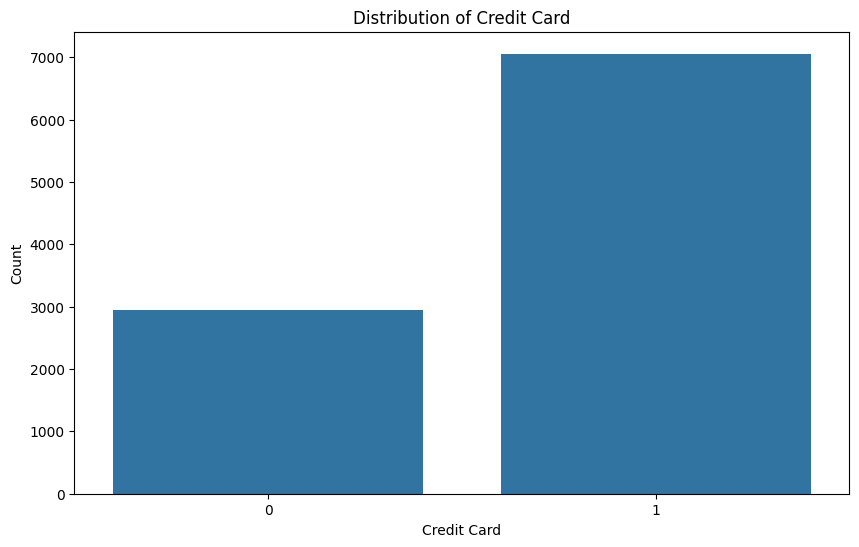

In [20]:
# Country
print(data['country'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=data)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Gender
print(data['gender'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Credit Card
print(data['credit_card'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_card', data=data)
plt.title('Distribution of Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()

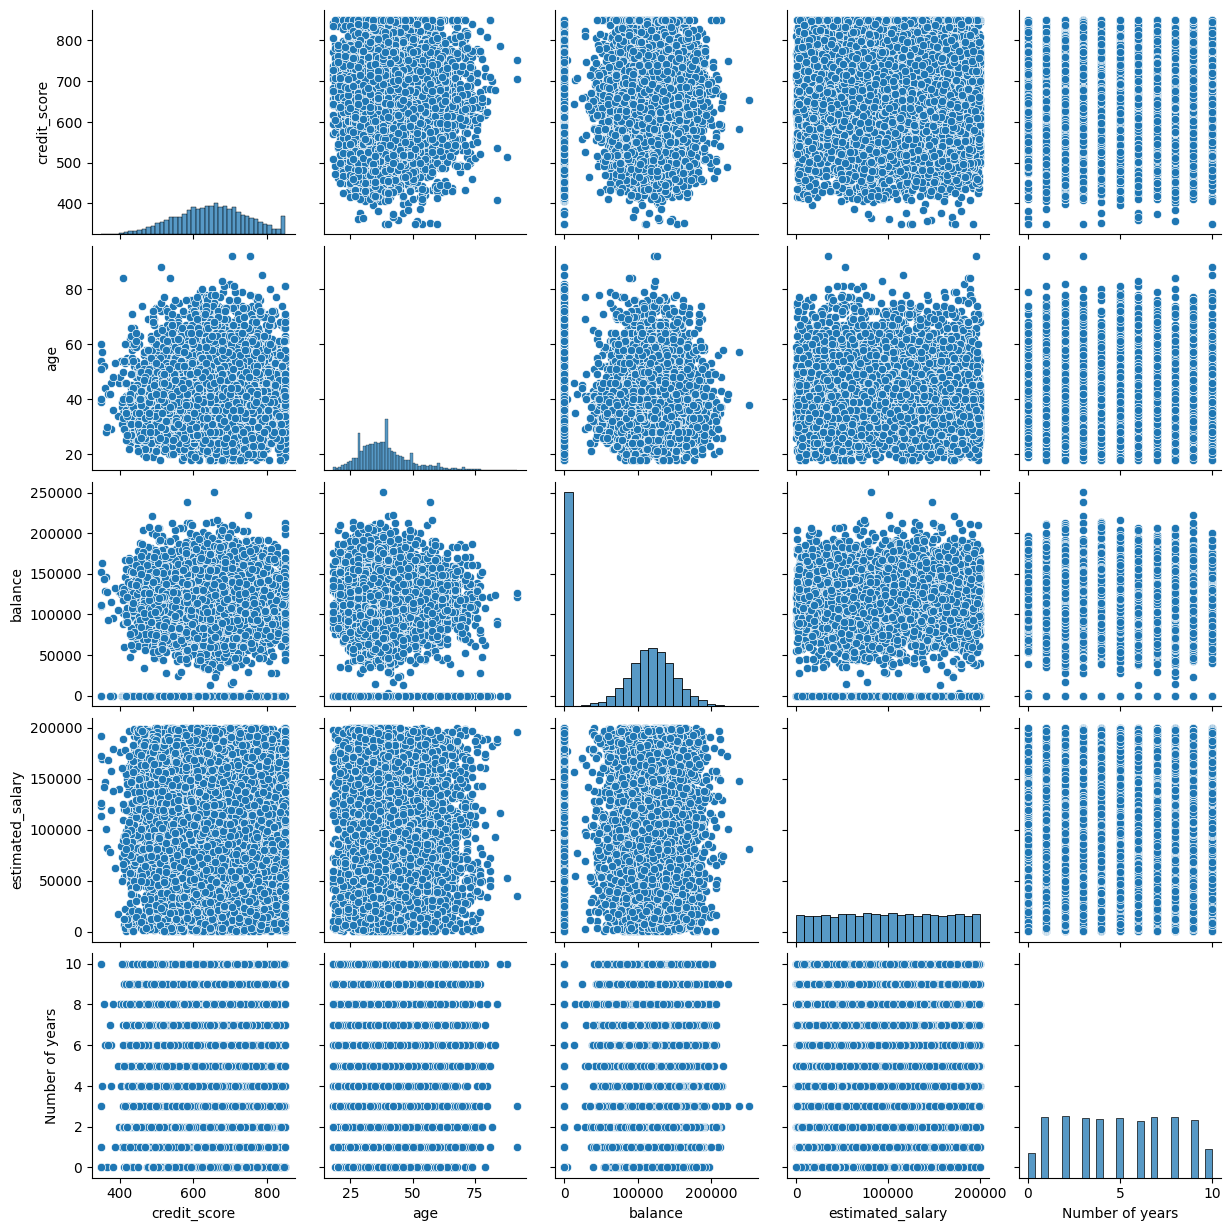

In [21]:
numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary', 'Number of years']
sns.pairplot(data[numerical_features])
plt.show()

<Axes: xlabel='products_number'>

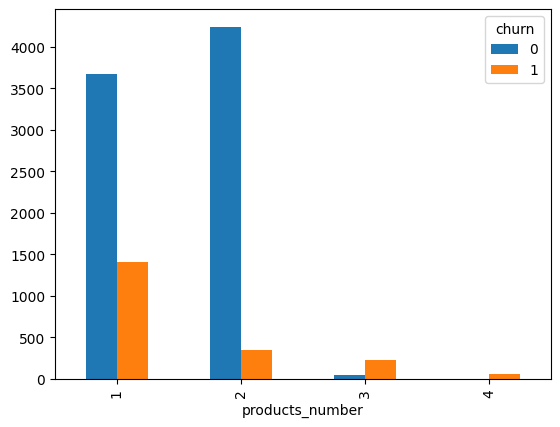

In [ ]:
data.groupby(['products_number','churn']).churn.count().unstack().plot(kind='bar')